# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [8]:
# Imports
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)

import pandas_profiling

from sklearn.model_selection import train_test_split


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.head()

# emit profiling data
pandas_profiling.ProfileReport(train)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<h3> Q.1. Drop the Id columns from both train and test as these are not needed for prediction</h3>

In [9]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h3> Q.2. Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?
</h3>

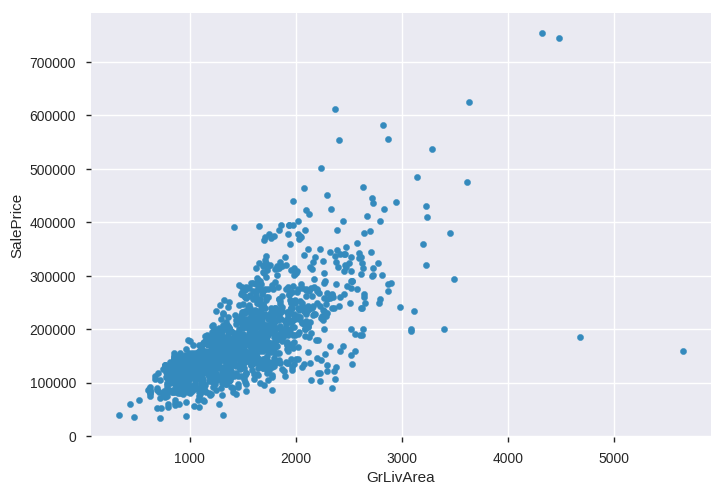

In [10]:
import matplotlib.pyplot as plt

train.plot(kind='scatter', x='GrLivArea', y='SalePrice')
plt.show()

# Yes I can spot some outliers especially when the value of GrLivArea is very high

<h3> Q.3. Remove outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again</h3>

(1456, 80)


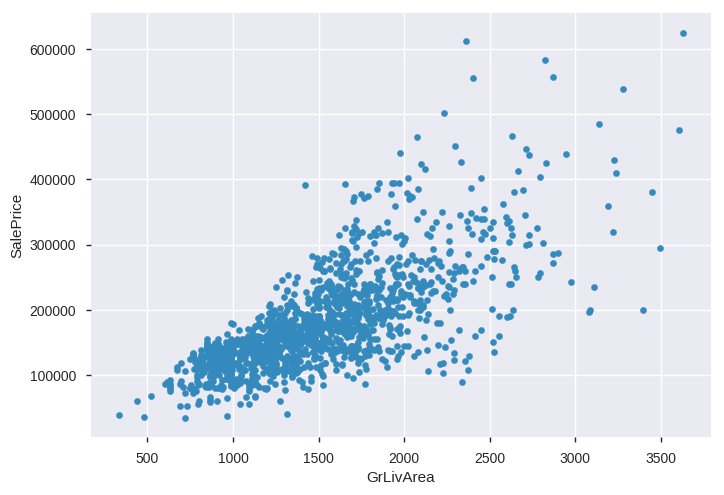

In [11]:
# Remove outliers for train['GrLivArea']>4000
train = train[train.GrLivArea <= 4000]

print(train.shape)
train.plot(kind='scatter', x='GrLivArea', y='SalePrice')
plt.show()

<h3> Q.4.0 Convert categorical variable into dummy variables using pandas get_dummies API</h3>


In [12]:
# get the categorical columns
cols = train.columns
num_cols = train._get_numeric_data().columns
categoricalColumns = list(set(cols) - set(num_cols))

train.dtypes
obj_train = train.select_dtypes(include=['object']).copy()
obj_train.head()
dummies = pd.get_dummies(data=obj_train, columns = obj_train.columns)
dummies

print(len(obj_train.columns))
train_withoutCategoricalColumns = train.drop(obj_train.columns, axis=1)
print("shape of train with non categorical columns", train_withoutCategoricalColumns.shape)

train = pd.concat([train_withoutCategoricalColumns, dummies], axis=1)
train.shape
train.head()

43
shape of train with non categorical columns (1456, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


<h3> Q.4.1 Impute missing data by the mean of each column.</h3>

In [13]:
#Command(s):
means = train.mean() # finding mean of every column
train = train.apply(lambda x: x.fillna(x.mean()),axis=0)
train.head()

MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               81
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
                        ... 
GarageCond_TA              0
PavedDrive_N               0
PavedDrive_P               0
PavedDrive_Y  

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


<h3> Q.4.2 Generate train test split 70/30</h3>

In [16]:
from sklearn.model_selection import train_test_split

X = train.loc[:, train.columns != 'SalePrice']
y = train.loc[:, train.columns == 'SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

<h3> Q.5. Fit a linear regression model to this data and compute the RMSE</h3>

In [23]:
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import sqrt
from sklearn import metrics

#Fit a linear regression model to this data
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

#Compute the RMSE 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 value:', metrics.r2_score(y_test, y_pred))


[[-5.89596717e+01  5.34889954e+01  8.98588498e-01  5.61784576e+03
   5.36561587e+03  3.01234770e+02  1.14081765e+02  2.85453950e+01
   1.75646555e+01  7.38936345e+00 -1.10728989e+00  2.38467032e+01
   1.77867778e+01  3.19609674e+01 -2.06590848e+01  2.90886717e+01
   8.08818417e+02 -3.02260135e+03  3.22130860e+03  3.17125354e+03
  -5.79671110e+03 -8.25667578e+03  3.32687289e+03  4.58975620e+03
   3.29800659e+01  3.73912958e+03  1.34682660e+01  1.12928320e+01
   2.07899379e+01  2.52341853e+01  3.70032022e+01  3.72982670e+01
   1.59345562e+02  5.32021061e-01 -5.90277010e+02 -1.24832885e+03
  -1.09119874e+04  1.37873726e+04 -5.50706647e+03  2.19453033e+03
   4.37150982e+02 -1.06344287e+04  1.06344287e+04  2.25646087e+03
   1.31712366e+03 -3.03964371e+02  1.03746644e+03 -2.26026805e+03
   1.52676598e+03  4.31983367e+03  7.60995443e+03 -1.21835034e+04
   2.53715320e+02  1.27771978e+04 -1.27771978e+04  2.86836778e+02
   1.12440165e+04 -5.02121587e+03 -8.65940791e+03  2.14977054e+03
   1.94622

## Lasso Regression

<h3> Q.6.0 Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)</h3>

In [24]:
from sklearn import linear_model
# importing the Lasso class from linear_model submodule of scikit learn
from sklearn.linear_model import Lasso
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV

# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20]}

# Passing in a Lasso estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
lasso= GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',lasso.fit(X_train,y_train).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Lasso estimator is:',lasso.fit(X_train,y_train).best_score_)

lasso_alpha20 = Lasso(alpha=20)
lasso_alpha20.fit(X_train,y_train)
#Compute the RMSE
y_pred = lasso_alpha20.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

#Compute the RMSE 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 value:', metrics.r2_score(y_test, y_pred))

The best value of alpha is: {'alpha': 20}
The best score for the best Lasso estimator is: -602753526.606321
Mean Absolute Error: 16662.44891546239
Mean Squared Error: 519241716.0568653
Root Mean Squared Error: 22786.875960887337
R2 value: 0.8965324964484221


<h3> Q.6.1 How many columns has the model chosen?</h3>

In [25]:
#TODO
lasso_alpha20.coef_

#number of columns where coefficient is not 0.
sum(1 for i in lasso_alpha20.coef_ if i != 0)

185

## Ridge Regression

<h3> Q.7. Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range).</h3> 

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 0.1, 1, 2, 3, 5, 8, 10, 20]}
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(X_train,y_train).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(X_train,y_train).best_score_)

ridge_alpha = Lasso(alpha=0.1, normalize=True)
ridge_alpha.fit(X_train,y_train)
#Compute the RMSE
y_pred = ridge_alpha.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

#Compute the RMSE 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 value:', metrics.r2_score(y_test, y_pred))

The best value of alpha is: {'alpha': 10}
The best score for the best Ridge estimator is: -559266830.62574
Mean Absolute Error: 17385.544335564296
Mean Squared Error: 563433996.7577187
Root Mean Squared Error: 23736.7646649184
R2 value: 0.8877264532916987


<h3> Q.8. What is your root mean squared error (RMSE)? Comment on your observation</h3>

In [27]:
#Compute the RMSE 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Ridge regression with apha set to 0.1 performed lesser than Lasso regression. But alpha = 10 is the best value to try it with.
# It will be interesting to check the value with alpha set to 10.

Root Mean Squared Error: 23736.7646649184


## Elastic Net Regression

<h3> Q.9. Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [35]:
#TODO: fit the Elastic net regression model to this data
from sklearn.linear_model import ElasticNet
alpha_values = {'alpha':[0.01, 0.1 , 20],'l1_ratio':[0.1,0.2,1]}
elastic= GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',elastic.fit(X_train,y_train).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',elastic.fit(X_train,y_train).best_score_)

#Compute the RMSE
y_pred = elastic.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#Compute the RMSE 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 value:', metrics.r2_score(y_test, y_pred))

C = [0.01, 0.1, 20]

for c in C:
    clf = ElasticNet(alpha=c, l1_ratio=0.1)
    clf.fit(X_train,y_train)
    #Compute the RMSE
    y_pred = clf.predict(X_test)
 
    #Compute the RMSE 
    print('C:', c)
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 value:', metrics.r2_score(y_test, y_pred))

The best value of alpha is: {'alpha': 0.01, 'l1_ratio': 0.1}
The best score for the best Ridge estimator is: -559624737.4369318
Mean Absolute Error: 16289.928954430721
Mean Squared Error: 492665489.08519155
Root Mean Squared Error: 22196.06922599566
R2 value: 0.9018282494157706
C: 0.01
Root Mean Squared Error: 22196.06922599566
R2 value: 0.9018282494157706
C: 0.1
Root Mean Squared Error: 22755.95246107078
R2 value: 0.8968131322231002
C: 20
Root Mean Squared Error: 31320.729147764006
R2 value: 0.8045218942780413


<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

This assignment helped us to learn regularization. I was able to learn how different regularization can be used in different scenarios. 
In real-world where data is expected to be skewed, this assignment worked as a comprehensive way to tackle those problems.
We learnt how we can apply regularization techniques to reduce dimensions and thereby improve the prediction accuracy and model interpretation.

It will be good to try out the regularization techniques on non high-dimensionality data. Elastic net regression was not covered in class. So took some time to learn that for the assignment.